In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Downloading latest data

import requests


new_cases = requests.get('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/new_cases.csv')

with open('new_cases.csv', 'wb') as f:
    f.write(new_cases.content)

In [3]:
# VARS

period_of_time = 30
country = 'Poland'

In [4]:
# opening file
data = pd.read_csv('new_cases.csv')

# extracting data from poland
data = data[[country]]

# last Y days
y = data.tail(period_of_time)

In [5]:
# from 0 to X
x = np.arange(0, period_of_time, 1).reshape(period_of_time, 1)

# making DataFrame from array
x = pd.DataFrame(x)

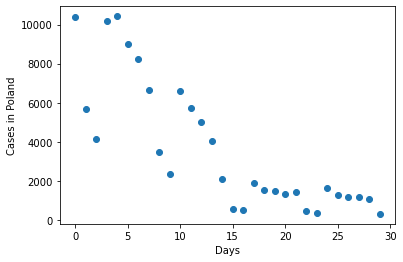

In [6]:
# plotting

plt.ylabel(f'Cases in {country}')
plt.xlabel('Days')

plt.scatter(x, y)
    
plt.plot()
plt.savefig('cases.jpg')

In [7]:
## % of positive tests
positive_tests = requests.get('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/testing/covid-testing-all-observations.csv')
with open('positive_tests.csv', 'wb') as f:
    f.write(positive_tests.content)

In [8]:
df = pd.read_csv('positive_tests.csv')
df = df[['Entity', 'Date', 'Short-term positive rate']]
df = df[df.Entity == f'{country} - tests performed']
df
last_date =df['Date'].tail(1).values[0]

'2022-04-07'

In [9]:
df = df.rename(columns={'Short-term positive rate':'positive-rate'})
# Last Y days
y = df.tail(period_of_time)

y = y['positive-rate'] * 100

70642    16.74
70643    16.66
70644    16.54
70645    16.26
70646    16.29
70647    16.29
70648    16.25
70649    16.31
70650    16.13
70651    16.42
70652    16.55
70653    16.43
70654    16.48
70655    16.21
70656    15.55
70657    15.06
70658    14.79
70659    14.41
70660    14.43
70661    14.56
70662    14.18
70663    13.39
70664    12.76
70665    12.43
70666    11.90
70667    11.96
70668    12.59
70669    11.72
70670    10.92
70671    10.33
Name: positive-rate, dtype: float64

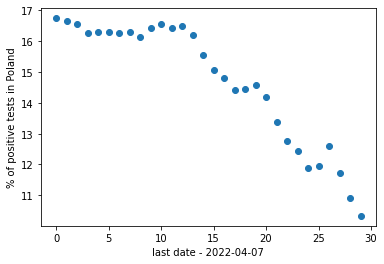

In [10]:
# plotting

plt.ylabel(f'% of positive tests in {country}')
plt.xlabel(f'last date - {last_date}')

plt.scatter(x, y)
    
plt.plot()
plt.savefig('covid_tests.jpg')